In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Read dataset
data = pd.read_csv("breastcancerdata.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Drop ID column and last column with NaN values 
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [4]:
# Separate x and y values
# Malignant -> 1 and Benign -> 0
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['diagnosis']=encoder.fit_transform(data['diagnosis'])

In [5]:
x_values = data.iloc[:, 1:] #all columns after first
y = data['diagnosis']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [6]:
# Normalize the x values such that all variables have same importance
x = (x_values - x_values.min())/(x_values.max()-x_values.min())
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [7]:
# Training data = 80%, Testing data = 20%
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2)

### Naive Bayes

Bayes’ Theorem tells us how to update the probability over a new instance after we have already 
observed some data X. Bayes’ Theorem computes the posterior distribution p(h|X) where h is the
hypothesis and X is the prior data or evidence. The Naive Bayes Classifier is a supervised machine 
learning algorithm that calculates the probability of a class given a set of features by applying
Bayes Theorem. Hence, the Naive Bayes Classifier is as follows: 

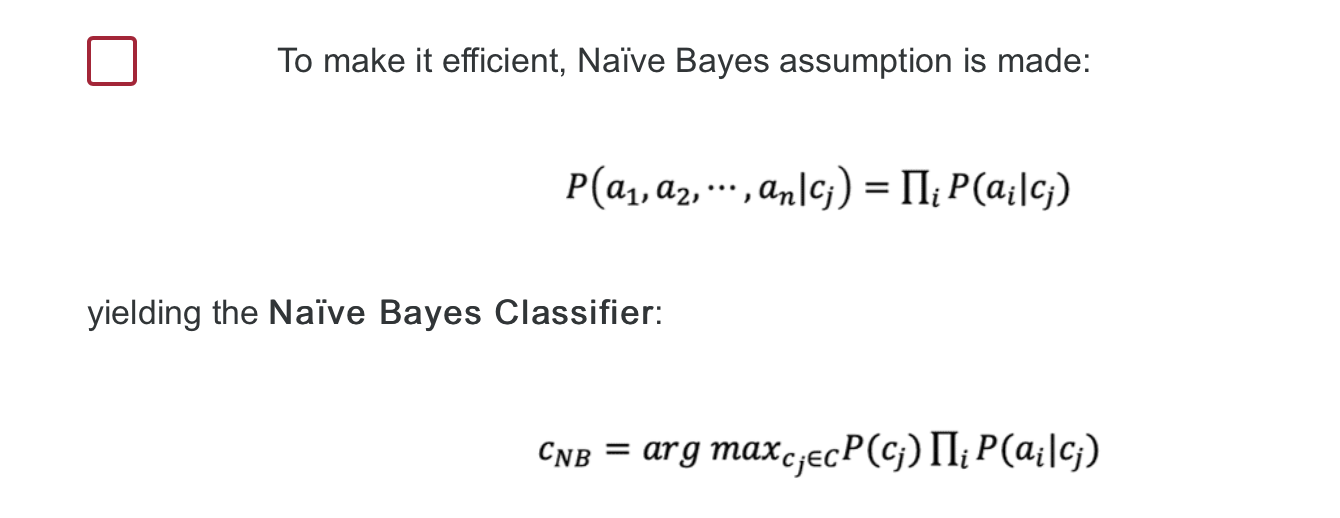

The above image is taken from Stevens Interactive Course Textbook. 

According to the Naive Bayes Classifier, the likelihood of a class is the maximum likelihood of the class multiplied 
to the product of the probability of an attribute given the class. The assumption here is that the attributes are 
independent, hence the probability of all attributes given the class is the product of each of the probabilities of an 
attribute given the class. This is why the classifier is called naive. In reality, the attributes may not be independent.
However, to measure that the lack of independence is very difficult. 

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [13]:
gnb.score(x_test,y_test)

0.9035087719298246

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred =gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[67  6]
 [ 5 36]]


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        73
           1       0.86      0.88      0.87        41

    accuracy                           0.90       114
   macro avg       0.89      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



The Gaussian Naive Bayes model has a precision of 0.93 in identifying benign cancer masses and a precision of 0.86
in identifying malignant cancer masses. The model has 6 false positives and 5 false negatives. 

### Using GridSearch to find best parameters for Gaussian Naive Bayes Classifier

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid_gnb = {
    'var_smoothing': np.logspace(0,-9, num=100)    # log scale, starts from 0, ends at -9, generates 100 samples.
}

gnb_grid = GridSearchCV(estimator = GaussianNB(), 
                        param_grid = param_grid_gnb, 
                        verbose = 1, 
                        cv = 5, 
                        n_jobs=-1)

gnb_grid.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [17]:
gnb_grid.best_params_

{'var_smoothing': 0.23101297000831597}

In [18]:
gnb_new = GaussianNB(var_smoothing = 0.2310129700083159)
gnb_new.fit(x_train, y_train)

GaussianNB(var_smoothing=0.2310129700083159)

In [19]:
gnb.score(x_test,y_test)

0.9035087719298246

In [20]:
y_gnb_new = gnb_new.predict(x_test) 
print(confusion_matrix(y_test,y_gnb_new))

[[69  4]
 [ 6 35]]


In [21]:
print(classification_report(y_test,y_gnb_new))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        73
           1       0.90      0.85      0.88        41

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



Gaussian Naive Bayes only have 2 parameters: priors (prior probabilities) and var_smoothing (to widen or smooth the curve).
The result of using GridSearchCV() and fine tuning var_smoothing is a 0.92 precision of predicting benign cancer masses
and a 0.90 precision of predicting malignant cancer masses. The model with fine tuning had 4 false positives 
and 6 false negatives. 

This result with GridSearchCV() had the same accuracy score as the result with default values, but the new results had precision scores.  